In [1]:
import pandas as pd
import numpy as np

In [13]:
orgCUB_214 = pd.read_table('214organism_CUBbiasFeatures.txt',index_col=0)
orgAACB_214 = pd.read_table('214organism_AACBiasFeatures.txt',index_col=0)

In [14]:
orgCUB_214.head()

,CUBHE,ConsistencyHE,CPB,Ori,OGT,doublingT
#file_name,,,,,,
Acaryochloris_marina,0.602835,0.546782,-0.406485,3125510.0,25.0,45.00
Acidovorax_avenae,0.663076,0.472849,-0.175180,27627.0,28.0,11.00
Acinetobacter_ADP1,0.836727,0.519002,-0.414569,3598158.0,30.0,0.50
Actinobacillus_pleuropneumoniae,0.843606,0.519748,-0.465378,1883252.0,37.0,0.75
Aeromonas_hydrophila,1.086505,0.547828,-0.277585,4729112.0,28.0,0.35


In [15]:
orgAACB_214.head()

,AACB_HE,AACB_consistency
#species_name,,
Acaryochloris_marina,0.009206,0.010506
Acidovorax_avenae,0.023752,0.008840
Acinetobacter_ADP1,0.036880,0.011086
Actinobacillus_pleuropneumoniae,0.024217,0.009492
Aeromonas_hydrophila,0.022070,0.007835


In [16]:
#merge CUBias features and AACBias features
orgCUB_AACB_214 = pd.merge(orgCUB_214,orgAACB_214,left_index=True,right_index=True)

In [17]:
orgCUB_AACB_214.head()

,CUBHE,ConsistencyHE,CPB,Ori,OGT,doublingT,AACB_HE,AACB_consistency
#file_name,,,,,,,,
Acaryochloris_marina,0.602835,0.546782,-0.406485,3125510.0,25.0,45.00,0.009206,0.010506
Acidovorax_avenae,0.663076,0.472849,-0.175180,27627.0,28.0,11.00,0.023752,0.008840
Acinetobacter_ADP1,0.836727,0.519002,-0.414569,3598158.0,30.0,0.50,0.036880,0.011086
Actinobacillus_pleuropneumoniae,0.843606,0.519748,-0.465378,1883252.0,37.0,0.75,0.024217,0.009492
Aeromonas_hydrophila,1.086505,0.547828,-0.277585,4729112.0,28.0,0.35,0.022070,0.007835


In [18]:
#save Growth Rate features(CUBias+AACBias) to file(214organism_CUBbias_AACBias_Features.txt)
orgCUB_AACB_214.to_csv('214organism_CUBbias_AACBias_Features.txt',sep='\t')

In [19]:
#get rid of bacteria with OGT is under 15C and over 60C
orgCUB_AACB_183 = orgCUB_AACB_214[(orgCUB_AACB_214['OGT'].isnull()==True) | (orgCUB_AACB_214['OGT']>15) & (orgCUB_AACB_214['OGT']<60)]

In [21]:
orgCUB_AACB_183_features = orgCUB_AACB_183.drop(['Ori','OGT'],axis=1)

In [25]:
orgCUB_AACB_183_features.to_csv('183organism_CUBbias_AACBias_Features.txt',sep='\t')

In [23]:
orgCUB_AACB_183_features.head()

,CUBHE,ConsistencyHE,CPB,doublingT,AACB_HE,AACB_consistency
#file_name,,,,,,
Acaryochloris_marina,0.602835,0.546782,-0.406485,45.00,0.009206,0.010506
Acidovorax_avenae,0.663076,0.472849,-0.175180,11.00,0.023752,0.008840
Acinetobacter_ADP1,0.836727,0.519002,-0.414569,0.50,0.036880,0.011086
Actinobacillus_pleuropneumoniae,0.843606,0.519748,-0.465378,0.75,0.024217,0.009492
Aeromonas_hydrophila,1.086505,0.547828,-0.277585,0.35,0.022070,0.007835


In [ ]:
# R: get boxcox lambda
bc_milc <- boxcox(doublingT~CUBHE+ConsistencyHE+CPB,data=orgCUB_AACB_183_features)
lambda_boxcox <- bc_milc$x[which.max(bc_milc$y)]  #lambda_boxcox = -0.1414141

In [68]:
# Model assessment

from scipy import stats
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
lambda_boxcox = -0.1414141 # R calculate

def adjusted_R2(R2,n,k):
    return (1-((1-R2)*(n-1)/(n-k-1)))

y = stats.boxcox(orgCUB_AACB_183_features['doublingT'],lmbda=lambda_boxcox)
CUBias_model_X = orgCUB_AACB_183_features.loc[:,'CUBHE':'CPB']
CUBias_AACBias_model_X = orgCUB_AACB_183_features.loc[:,'CUBHE':'AACB_consistency'].drop('doublingT',axis=1)

CUBias_model = LinearRegression().fit(CUBias_model_X,y)
CUBias_AACBias_model = LinearRegression().fit(CUBias_AACBias_model_X,y)

CUBias_model_pred_y = CUBias_model.predict(CUBias_model_X)
CUBias_AACBias_model_pred_y = CUBias_AACBias_model.predict(CUBias_AACBias_model_X)

# MSE
MSE_CUBias_model = metrics.mean_squared_error(y,CUBias_model_pred_y)
MSE_CUBias_AACBias_model = metrics.mean_squared_error(y,CUBias_AACBias_model_pred_y)

# RMSE
RMSE_CUBias_model = np.sqrt(MSE_CUBias_model)
RMSE_CUBias_AACBias_model = np.sqrt(MSE_CUBias_AACBias_model)

# RSS
RSS_CUBias_model = np.sum((y - CUBias_model_pred_y)**2)
RSS_CUBias_AACBias_model = np.sum((y - CUBias_AACBias_model_pred_y)**2)

# R square
R_square_CUBias_model = metrics.r2_score(y,CUBias_model_pred_y)
R_square_CUBias_AACBias_model = metrics.r2_score(y,CUBias_AACBias_model_pred_y)

# adjusted R square
adjusted_R2_CUBias_model = adjusted_R2(R_square_CUBias_model,len(y),CUBias_model_X.shape[1])
adjusted_R2_CUBias_AACBias_model = adjusted_R2(R_square_CUBias_AACBias_model,len(y),CUBias_AACBias_model_X.shape[1])

# Organize Data
index_assessment = ['RMSE','MSE','RSS','R_square','adjusted_R_square']
CUB = [RMSE_CUBias_model,MSE_CUBias_model,RSS_CUBias_model,R_square_CUBias_model,adjusted_R2_CUBias_model]
CUB_AACB_EVQ =[RMSE_CUBias_AACBias_model,MSE_CUBias_AACBias_model,RSS_CUBias_AACBias_model,R_square_CUBias_AACBias_model,adjusted_R2_CUBias_AACBias_model]
Model_assessment = pd.DataFrame({
        'CUB':CUB,
        'CUB_AACB_EVQ' : CUB_AACB_EVQ
    
},index=index_assessment)
print('Model assessment:')
Model_assessment

Model assessment:


,CUB,CUB_AACB_EVQ
RMSE,0.769020,0.702269
MSE,0.591391,0.493182
RSS,108.224625,90.252383
R_square,0.638431,0.698475
adjusted_R_square,0.632371,0.689957


In [67]:
# model leave one out test
from sklearn.model_selection import LeaveOneOut,train_test_split

model_cub_pred_y = []
model_cub_aacb_pred_y = []
loo = LeaveOneOut()

for train_index, test_index in loo.split(CUBias_model_X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_cub_train, X_cub_test = CUBias_model_X.iloc[train_index,:], CUBias_model_X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    rg_cub_model = LinearRegression().fit(X_cub_train,y_train)
    model_cub_pred_y.append(float(rg_cub_model.predict(X_cub_test)))
    
    X_cub_aacb_train, X_cub_aacb_test = CUBias_AACBias_model_X.iloc[train_index,:], CUBias_AACBias_model_X.iloc[test_index,:]
    rg_cub_aacb_model = LinearRegression().fit(X_cub_aacb_train,y_train)
    model_cub_aacb_pred_y.append(float(rg_cub_aacb_model.predict(X_cub_aacb_test)))
    
R_square_cub_model = metrics.r2_score(y, model_cub_pred_y)
R_square_cub_aacb_model = metrics.r2_score(y, model_cub_aacb_pred_y)
#print(R_square_cub_model,R_square_cub_aacb_model)

adjusted_R_2_cub_loo = adjusted_R2(R_square_cub_model,len(y),CUBias_model_X.shape[1]) 
adjusted_R_2_cub_aacb_loo = adjusted_R2(R_square_cub_aacb_model,len(y),CUBias_model_X.shape[1]) 
#print(adjusted_R_2_cub,adjusted_R_2_cub_aacb)

index_leaveOneOut = ['R_square', 'adjusted_R_square']
CUB_LOO = [R_square_cub_model, adjusted_R_2_cub_loo]
CUB_AACB_EVQ_LOO = [R_square_cub_aacb_model,adjusted_R_2_cub_aacb_loo]

Model_leaveOneOut = pd.DataFrame({
        'CUB' : CUB_LOO,
        'CUB_AACB_EVQ' : CUB_AACB_EVQ_LOO
    
},index=index_leaveOneOut)
print('Leave One Out Test:')
Model_leaveOneOut

Leave One Out Test:


,CUB,CUB_AACB_EVQ
R_square,0.622976,0.678818
adjusted_R_square,0.616657,0.673435


In [ ]:
from scipy.special import boxcox, inv_boxcox
lambda_boxcox = -0.1414141
def hours(x):
    if x >= 5:
        return 'slow'
    else:
        return 'fast'
orgCUB_AACB_183['hours'] = orgCUB_AACB_183['doublingT'].apply(hours)
orgCUB_AACB_183['predicted_doublingTime_CUBias_Model'] = inv_boxcox(CUBias_model_pred_y,lambda_boxcox)
orgCUB_AACB_183['predicted_doublingTime_CUBias_AACBias_Model'] = inv_boxcox(CUBias_AACBias_model_pred_y,lambda_boxcox)

In [39]:
orgCUB_AACB_183.head()

,CUBHE,ConsistencyHE,CPB,Ori,OGT,doublingT,AACB_HE,AACB_consistency,hours,predicted_doublingTime_CUBias_Model,predicted_doublingTime_CUBias_AACBias_Model
#file_name,,,,,,,,,,,
Acaryochloris_marina,0.602835,0.546782,-0.406485,3125510.0,25.0,45.00,0.009206,0.010506,slow,9.999997,19.002539
Acidovorax_avenae,0.663076,0.472849,-0.175180,27627.0,28.0,11.00,0.023752,0.008840,slow,3.116301,4.151486
Acinetobacter_ADP1,0.836727,0.519002,-0.414569,3598158.0,30.0,0.50,0.036880,0.011086,fast,0.621294,0.524352
Actinobacillus_pleuropneumoniae,0.843606,0.519748,-0.465378,1883252.0,37.0,0.75,0.024217,0.009492,fast,0.517313,0.553292
Aeromonas_hydrophila,1.086505,0.547828,-0.277585,4729112.0,28.0,0.35,0.022070,0.007835,fast,0.194999,0.238760


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
predict_doublingTime_data = pd.DataFrame()
predict_doublingTime_data['hours'] = orgCUB_AACB_183['hours']
predict_doublingTime_data['doublingT'] = np.log(orgCUB_AACB_183.loc[:,'doublingT'])
predict_doublingTime_data['predicted_doublingTime_CUBias_Model'] = np.log(orgCUB_AACB_183['predicted_doublingTime_CUBias_Model'])
predict_doublingTime_data['predicted_doublingTime_CUBias_AACBias_Model'] = np.log(orgCUB_AACB_183['predicted_doublingTime_CUBias_AACBias_Model'])


CUBias model R square: 0.6323712371974128


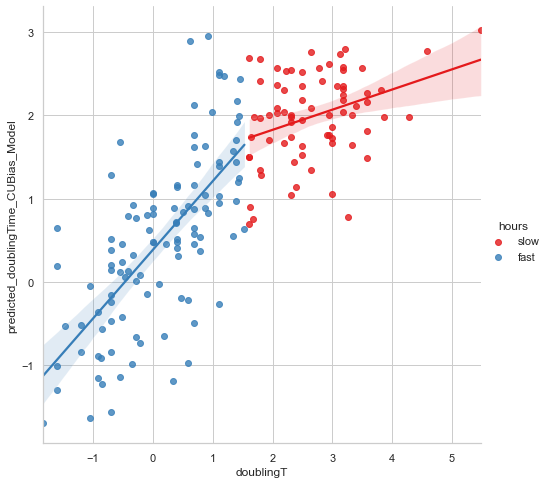

In [118]:
sns.set_theme(style="whitegrid")
abc = sns.lmplot(x='doublingT',
              y='predicted_doublingTime_CUBias_Model',
              data = predict_doublingTime_data,
              hue = 'hours',
              order=1,
              truncate=True,
              palette="Set1",
              height=6.7,
              )
print('CUBias model R square:',adjusted_R2_CUBias_model)

CUBias+AACBias model R square: 0.6899570674402349


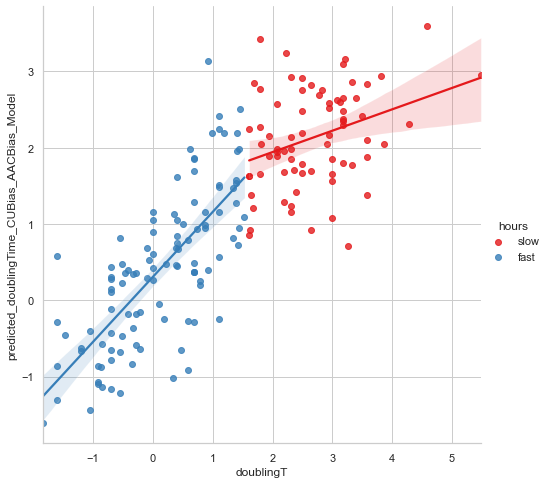

In [72]:
sns.set_theme(style="whitegrid")
abc = sns.lmplot(x='doublingT',
              y='predicted_doublingTime_CUBias_AACBias_Model',
              data = predict_doublingTime_data,
              hue = 'hours',
              order=1,
              truncate=True,
              palette="Set1",
              height=6.7
              )
print('CUBias+AACBias model R square:',adjusted_R2_CUBias_AACBias_model)

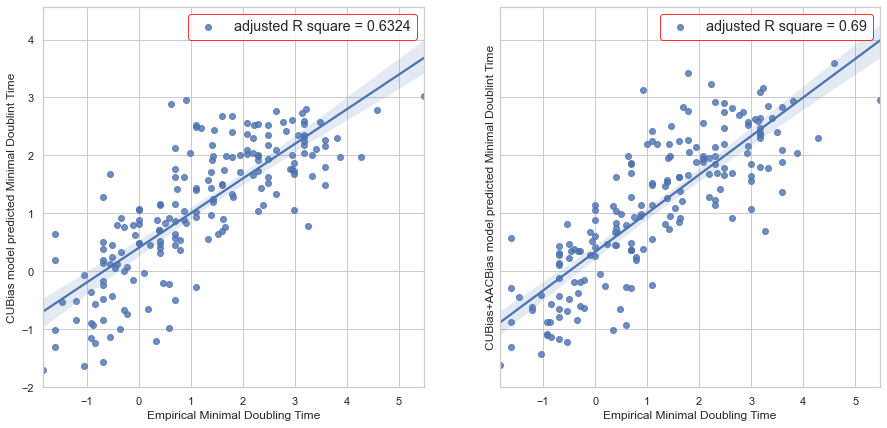

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(15,7))

sns.set_theme(style="whitegrid")
cubbias_plot = sns.regplot(x='doublingT',
              y='predicted_doublingTime_CUBias_Model',
              data = predict_doublingTime_data,
              order=1,
              truncate=True,
              label = "adjusted R square = {0}".format(round(adjusted_R2_CUBias_model,4)),
              ax=ax1,
              )
cubbias_aabias_plot = sns.regplot(x='doublingT',
              y='predicted_doublingTime_CUBias_AACBias_Model',
              data = predict_doublingTime_data,
              order=1,
              truncate=True,
              label = "adjusted R square = {0}".format(round(adjusted_R2_CUBias_AACBias_model,4)),
              ax=ax2
              )
ax1.set(
        xlabel='Empirical Minimal Doubling Time',
        ylabel = 'CUBias model predicted Minimal Doublint Time'
        )
ax1.legend(edgecolor='red',fontsize='large')

ax2.set(
        xlabel='Empirical Minimal Doubling Time',
        ylabel = 'CUBias+AACBias model predicted Minimal Doublint Time')
ax2.legend(edgecolor='red',fontsize='large')